#### Importing our Libraries

In [39]:
#LINEAR REGRESSION
#TO DO  - 
#I did this for Egypt, but they probably need it for all the countries on here, idk how to clean this up so when i do that work it is clean
#clean data, remove empty, then linear regression for all of data too
#box plot remove outliers :(
#MSE, RMSE, ETC


# importing packages
import numpy as np
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

#### Learning about our Dataset

In [21]:
# importing zipped csv data
#DataSet = pd.read_csv('Data/Marriage_Divorce_DataSet.csv', compression = 'gzip')
DataSet= pd.read_csv('Data/Life_Expectancy_Data.csv')
DataSet

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [22]:
DataSet.dtypes


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [23]:
DataSet.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
DataSet.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [25]:
DataSet.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### Plotting the Data

In [26]:
Egypt = DataSet[DataSet['Country'].str.strip()=='Egypt']
Egypt[['Year','Life expectancy ']].head(16)

,Year,Life expectancy
802,2015,79.0
803,2014,78.0
804,2013,79.0
805,2012,72.0
806,2011,74.0
807,2010,70.0
808,2009,69.9
809,2008,69.8
810,2007,69.7
811,2006,69.5


In [27]:
Egypt[['Year','Life expectancy ']].describe()

,Year,Life expectancy
count,16.000000,16.000000
mean,2007.500000,71.500000
std,4.760952,3.819249
min,2000.000000,68.600000
25%,2003.750000,68.950000
50%,2007.500000,69.750000
75%,2011.250000,72.500000
max,2015.000000,79.000000


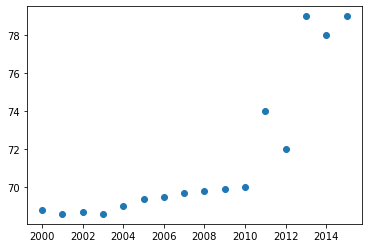

In [28]:
x_year = Egypt['Year'].values
y_life_expectancy = Egypt['Life expectancy '].values
plt.scatter(x_year, y_life_expectancy)
plt.show()


#### Making and Plotting the Prediction

In [35]:
#creating a column vector
x_year_vector = x_year.reshape(-1,1)


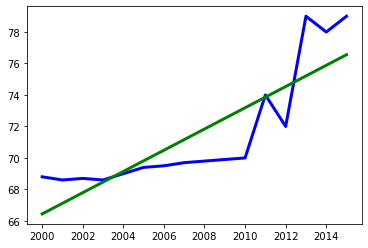

In [32]:
model = LinearRegression()
model.fit(x_year_vector, y_life_expectancy)
prediction = model.predict(x_year_vector)

plt.plot(x_year, y_life_expectancy, color = 'blue', linewidth=3, label= 'Unweighted Model')
plt.plot(x_year, prediction, color = 'green', linewidth=3, label= 'Weighted Model')

#### Training the Model 

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_year_vector, y_life_expectancy, train_size=.7, test_size=.3)


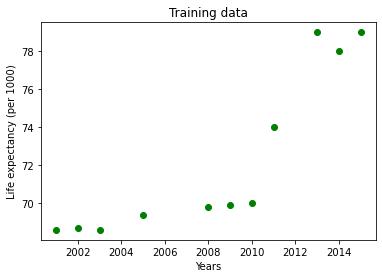

In [36]:
#plot the training data
plt.scatter(x_train,y_train,color='green')
plt.xlabel('Years')
plt.ylabel('Life expectancy (per 1000)')
plt.title('Training data')
plt.show()

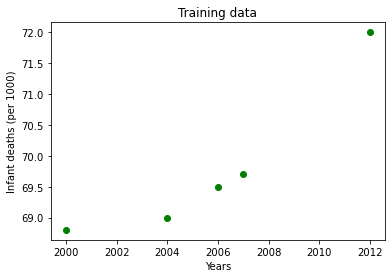

In [37]:
#plot the testing data
plt.scatter(x_test,y_test,color='green')
plt.xlabel('Years')
plt.ylabel('Infant deaths (per 1000)')
plt.title('Training data')
plt.show()

In [38]:
#Regression Model Score
lm = LinearRegression()
lm.fit(x_train, y_train)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 75.91 %
Test accuracy -236.1 %


#### Visuals of our Data

In [ ]:
x_year= 

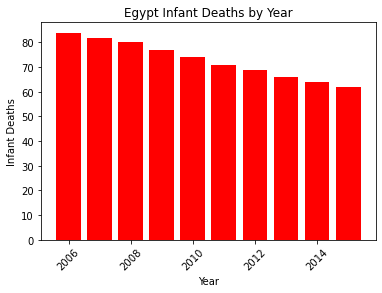

<Figure size 432x288 with 0 Axes>

In [40]:
#How do I make this a line graph??
#we want to plot the director verses ratio (fresh to rotten)
plot_love_loyalty = plt.bar(x ='Year', height = 'infant deaths',data = DataSet.iloc[:10], color='red')


plt.xticks(rotation=45)

# set x and y axes labels
plt.xlabel('Year')
plt.ylabel('Infant Deaths')

#set the title
plt.title('Egypt Infant Deaths by Year Bar Graph')

#plt.legend(['Infant Deaths'])

#shows final output
plt.show()

#saving this boxplot for the presentation
plt.savefig("Egypt Infant Deaths by Year")

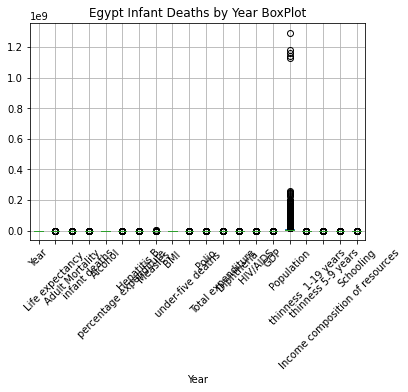

<Figure size 432x288 with 0 Axes>

In [41]:
#how do i split this up??
#boxplot showing the overview of directors to total numbers of fresh reviews
DataSet.boxplot()

plt.title('Egypt Infant Deaths by Year BoxPlot')
#plt.legend()

# Set x and y axes labels
plt.xlabel('Year')
#plt.ylabel('')

plt.xticks(rotation=45)

#shows the boxplot
plt.show()

#saving this boxplot for the presentation
plt.savefig("Egypt Infant Deaths by Year BoxPlot")